In [1]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt

### Problem Statement

We've been given two data points ($m$ is 2). Each point describes the size of a house and the corresponding price.

| Size (1000 sqft)     | Price (1000s of dollars) |
| ----------------| ------------------------ |
| 1               | 300                      |
| 2               | 500                      |

In [2]:
# Load our data set
x_train = np.array([1.0, 2.0])       #features
y_train = np.array([300.0, 500.0])   #target values

### Model
Let's use the model. So for a given input value (size of a house), and settings for our paramters ($w$ and $b$), our model can predict the price of the house. Since there's only two data points, the correct model is the line that passes through both of these points. We can work out the answer by hand, but let's see how linear regression works on the problem. (Correct answer for a model of the form $f_{wb}(x) = wx + b$ on this dataset is $w$=200 and $b$=100.)

In [3]:
def f_wb(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (scalar): input value 
      w,b (scalar): model parameters  
    Returns
      predicted value based on x, w, and b
    """
    return w * x + b

We'll use `plot_predictions` to plot how our model is doing. 

In [4]:
def plot_predictions(x, y, w, b):
    """
    Plots prediction model and actual values
    Args:
      x (ndarray(m,)): input values, m examples
      y (ndarray(m,)): output values, m examples (the correct answers)
      w,b (scalar): model parameters  
    """
    
    m = x.shape[0]
    
    predictions = np.zeros(m)
    
    for i in range(m):
        predictions[i] = f_wb(x[i], w, b) 

    # Plot our model prediction
    plt.plot(x, predictions, c='b',label='Our Prediction')

    # Plot the data points
    plt.scatter(x, y, marker='x', c='r',label='Actual Values')

    # Set the title
    plt.title("Housing Prices")
    # Set the y-axis label
    plt.ylabel('Price (in 1000s of dollars)')
    # Set the x-axis label
    plt.xlabel('Size (1000 sqft)')
    plt.legend()
    plt.show()

Before we get into any machine learning, let's try some values of $w$ and $b$ (`w_try`, `b_try`) and see what comes out.

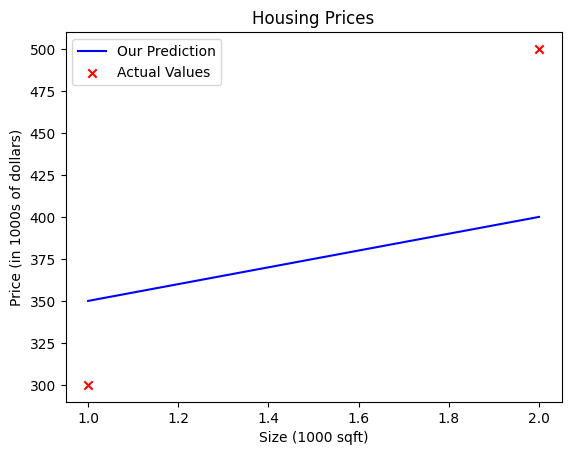

In [5]:
w_try = 50
b_try = 300

plot_predictions(x_train, y_train, w_try, b_try)

We're not doing that great. The blue line is what we would use to predict prices given some test sizes.

### Compute Cost
Keeping track of the cost will help us know how well the $w$ and $b$ parameters capture the training data. 

In [6]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
    """
    Computes the cost of a model
    Args:
      x (ndarray(m,)): input values, m examples
      y (ndarray(m,)): output values, m examples (the correct answers)
      w,b (scalar): model parameters  
    Returns
      cost based on mean square error of prediction (using x, w, and b) and the correct asnwer (y)
    """
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        cost = cost + (f_wb(x[i], w, b) - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [7]:
compute_cost(x_train, y_train, w_try, b_try)

3125.0

In [8]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): input values, m examples
      y (ndarray (m,)): output values, m examples (the correct answers)
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        dj_dw += (f_wb(x[i], w, b) - y[i]) * x[i]
        dj_db += (f_wb(x[i], w, b) - y[i])
    dj_dw = dj_dw / m
    dj_db = dj_db / m
        
    return dj_dw, dj_db

`run_gradient_descent` will run gradient descent. The initial values for parameters (`w_initial` and `b_initial`), the learning rate (`alpha`), and how long to run gradient descent (`num_iters`) are specified by the user. The history of the cost and the parameter values are stored and returned (`J_history` and `p_history`).

In [9]:
def run_gradient_descent(w_initial, b_initial, alpha, num_iters, J_history, p_history):
    """
    Computes the gradient for linear regression 
    Args:
      w_initial (scalar): initial value of w
      b_initial (scalar): initial value of b
      alpha: learning rate
      num_iters (scalar): how long gradient descent will be run
      J_history (list): store cost after every iteration
      p_history (list): store parameter tuple (w,b) after every iteration
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    w = w_initial
    b = b_initial
    
    for i in range(num_iters):
        
        # Get the gradients
        dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)
    
        # Update parameters
        w = w - alpha * dj_dw                       
        b = b - alpha * dj_db

        # Save off for plotting
        J_history.append(compute_cost(x_train, y_train, w , b))
        p_history.append([w,b])
    
        # Print cost every at intervals
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, J_history, p_history

In [10]:
J_history = []
p_history = []

num_iters = 100

alpha = 0.008

w_initial = 0.
b_initial = 0.

w_final, b_final, J_history, p_history = run_gradient_descent(w_initial, b_initial, alpha, num_iters, J_history, p_history)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 8.04e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  5.200e+00, b: 3.20000e+00
Iteration   10: Cost 4.61e+04  dj_dw: -4.924e+02, dj_db: -3.026e+02   w:  4.998e+01, b: 3.07371e+01
Iteration   20: Cost 2.65e+04  dj_dw: -3.731e+02, dj_db: -2.289e+02   w:  8.390e+01, b: 5.15675e+01
Iteration   30: Cost 1.52e+04  dj_dw: -2.827e+02, dj_db: -1.730e+02   w:  1.096e+02, b: 6.73190e+01
Iteration   40: Cost 8.71e+03  dj_dw: -2.143e+02, dj_db: -1.308e+02   w:  1.291e+02, b: 7.92243e+01
Iteration   50: Cost 5.00e+03  dj_dw: -1.625e+02, dj_db: -9.873e+01   w:  1.439e+02, b: 8.82172e+01
Iteration   60: Cost 2.87e+03  dj_dw: -1.232e+02, dj_db: -7.448e+01   w:  1.551e+02, b: 9.50045e+01
Iteration   70: Cost 1.65e+03  dj_dw: -9.348e+01, dj_db: -5.612e+01   w:  1.636e+02, b: 1.00122e+02
Iteration   80: Cost 9.54e+02  dj_dw: -7.097e+01, dj_db: -4.222e+01   w:  1.700e+02, b: 1.03974e+02
Iteration   90: Cost 5.53e+02  dj_dw: -5.392e+01, dj_db: -3.169e+01   w:  1.749e+02, b: 1.06869e+02


### Cost versus iterations of gradient descent 
A plot of cost versus iterations is a useful measure of progress of the gradient descent process.

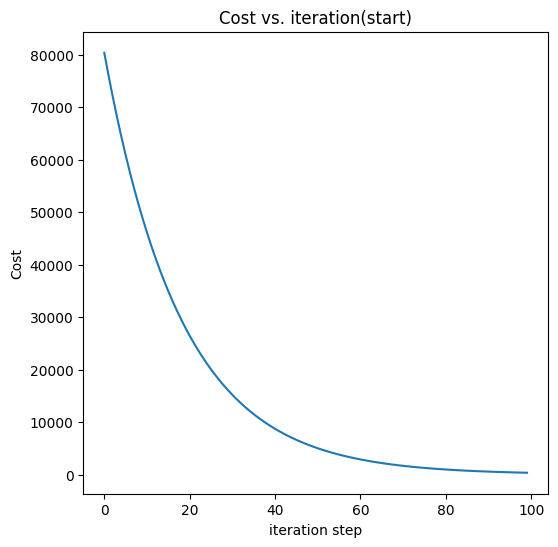

In [11]:
# plot cost versus iteration  
fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.plot(J_history)
ax.set_title("Cost vs. iteration(start)")
ax.set_ylabel('Cost')            
ax.set_xlabel('iteration step')  
plt.show()

### Final Model
Let's use the values of the parameters $w$ and $b$ found using Gradient Descent (`w_final`, `b_final`) to plot the model.

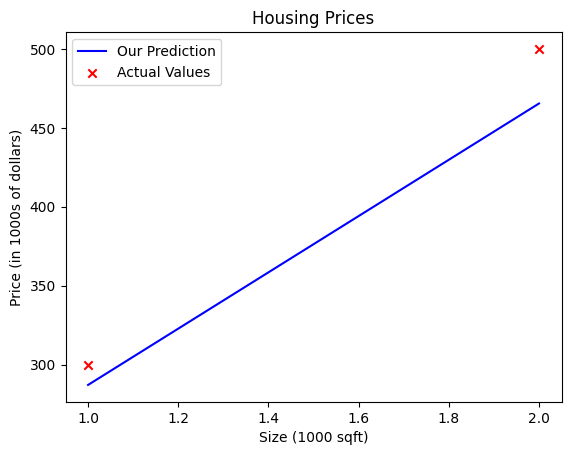

In [12]:
plot_predictions(x_train, y_train, w_final, b_final)

Iteration    0: Cost 7.51e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  3.679e+02, b: 2.26400e+02
Iteration   10: Cost 2.16e+04  dj_dw: -3.491e+02, dj_db: -2.146e+02   w:  2.890e+02, b: 1.69821e+02
Iteration   20: Cost 6.24e+03  dj_dw: -1.875e+02, dj_db: -1.152e+02   w:  2.470e+02, b: 1.38769e+02
Iteration   30: Cost 1.80e+03  dj_dw: -1.007e+02, dj_db: -6.177e+01   w:  2.247e+02, b: 1.21656e+02
Iteration   40: Cost 5.19e+02  dj_dw: -5.411e+01, dj_db: -3.313e+01   w:  2.129e+02, b: 1.12179e+02
Iteration   50: Cost 1.50e+02  dj_dw: -2.907e+01, dj_db: -1.776e+01   w:  2.067e+02, b: 1.06900e+02
Iteration   60: Cost 4.32e+01  dj_dw: -1.562e+01, dj_db: -9.518e+00   w:  2.035e+02, b: 1.03942e+02
Iteration   70: Cost 1.25e+01  dj_dw: -8.396e+00, dj_db: -5.099e+00   w:  2.018e+02, b: 1.02272e+02
Iteration   80: Cost 3.60e+00  dj_dw: -4.513e+00, dj_db: -2.730e+00   w:  2.009e+02, b: 1.01322e+02
Iteration   90: Cost 1.04e+00  dj_dw: -2.427e+00, dj_db: -1.461e+00   w:  2.004e+02, b: 1.00777e+02


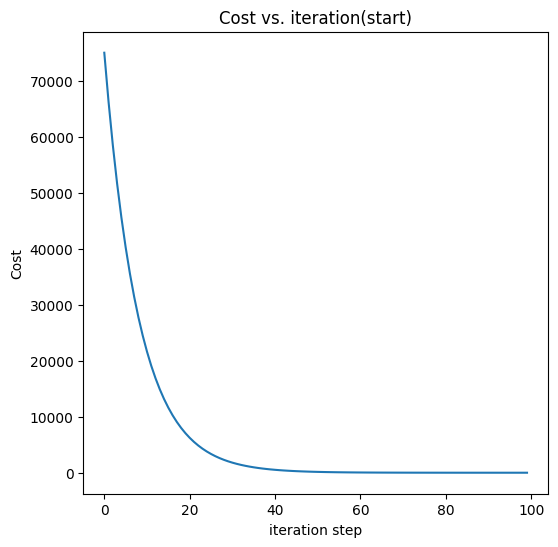

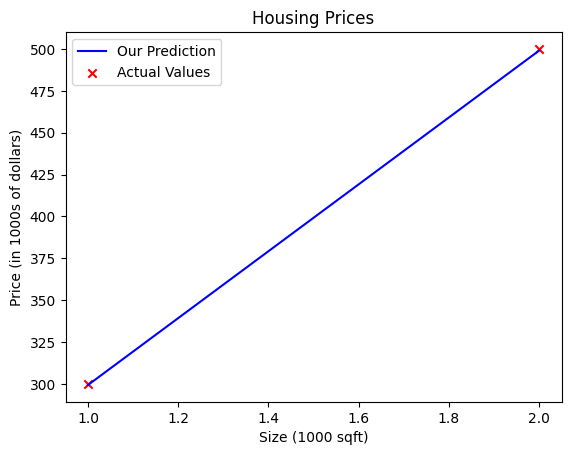

In [13]:
J_history = []
p_history = []

num_iters = 100

alpha = 0.566 #FIX ME. 

w_initial = 0.
b_initial = 0.

# Run gradient descent
w_final, b_final, J_history, p_history = run_gradient_descent(w_initial, b_initial, alpha, num_iters, J_history, p_history)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

# plot cost versus iteration  
fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.plot(J_history)
ax.set_title("Cost vs. iteration(start)")
ax.set_ylabel('Cost')            
ax.set_xlabel('iteration step')  
plt.show()

# Plot final model
plot_predictions(x_train, y_train, w_final, b_final)

Iteration    0: Cost 8.88e+04  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  3.835e+02, b: 2.36000e+02
Iteration   10: Cost 1.37e+05  dj_dw: -8.072e+02, dj_db: -4.978e+02   w:  4.341e+02, b: 2.59212e+02
Iteration   20: Cost 2.12e+05  dj_dw: -1.003e+03, dj_db: -6.191e+02   w:  4.948e+02, b: 2.91539e+02
Iteration   30: Cost 3.27e+05  dj_dw: -1.246e+03, dj_db: -7.696e+02   w:  5.688e+02, b: 3.33952e+02
Iteration   40: Cost 5.05e+05  dj_dw: -1.548e+03, dj_db: -9.565e+02   w:  6.599e+02, b: 3.88100e+02
Iteration   50: Cost 7.79e+05  dj_dw: -1.924e+03, dj_db: -1.189e+03   w:  7.725e+02, b: 4.56316e+02
Iteration   60: Cost 1.20e+06  dj_dw: -2.390e+03, dj_db: -1.477e+03   w:  9.120e+02, b: 5.41681e+02
Iteration   70: Cost 1.86e+06  dj_dw: -2.970e+03, dj_db: -1.836e+03   w:  1.085e+03, b: 6.48145e+02
Iteration   80: Cost 2.87e+06  dj_dw: -3.691e+03, dj_db: -2.281e+03   w:  1.300e+03, b: 7.80687e+02
Iteration   90: Cost 4.43e+06  dj_dw: -4.586e+03, dj_db: -2.834e+03   w:  1.567e+03, b: 9.45548e+02


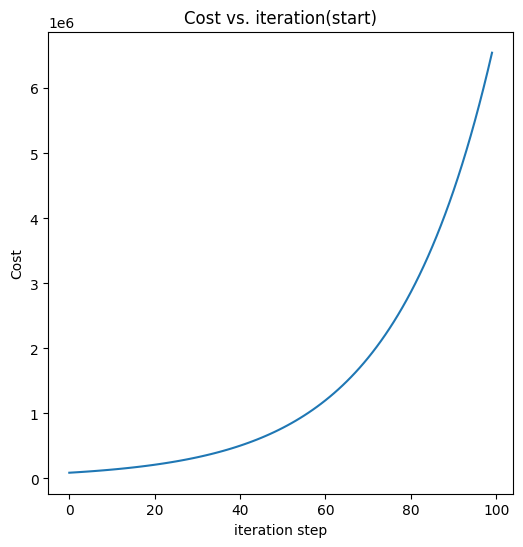

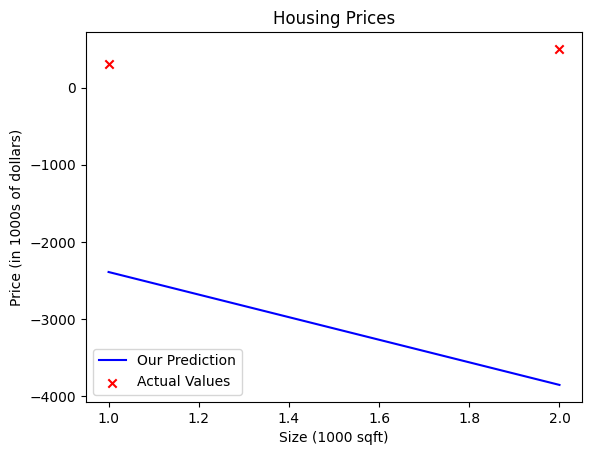

In [14]:
J_history = []
p_history = []

num_iters = 100

alpha = 0.590 #Experiment and leave it set to the value you find

w_initial = 0.
b_initial = 0.

# Run gradient descent
w_final, b_final, J_history, p_history = run_gradient_descent(w_initial, b_initial, alpha, num_iters, J_history, p_history)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

# plot cost versus iteration  
fig, ax = plt.subplots(1,1, figsize=(6, 6))
ax.plot(J_history)
ax.set_title("Cost vs. iteration(start)")
ax.set_ylabel('Cost')            
ax.set_xlabel('iteration step')  
plt.show()

# Plot final model
plot_predictions(x_train, y_train, w_final, b_final)